## Construindo  Decisions Trees usando Entropia e Índice Gini

* A base de dados utilizada será criada no projeto


* Uso das bibliotecas graphviz e pydot para visualização da árvore  

In [4]:
!conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [7]:
# Importações
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
import graphviz

In [8]:
# Criando o dataset
instancias = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'}
]

In [10]:
# Transformando em um Dataframe
df =  pd.DataFrame(instancias)
df

,Melhor Amigo,Especie
0,False,Cachorro
1,True,Cachorro
2,True,Gato
3,True,Gato
4,False,Gato
5,True,Gato
6,True,Gato
7,False,Cachorro
8,True,Gato
9,False,Cachorro


In [11]:
# Ajustando os dados
X_train = [[1] if a else [0] for a in df['Melhor Amigo']]
y_train = [1 if d == 'Cachorro' else 0 for d in df['Especie']]
labels = ['Melhor Amigo']

In [12]:
X_train

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]

In [13]:
y_train

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [14]:
# Árvore baseada em entropia
modelo_v1 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'entropy', # Critério da entropia
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2) 

In [16]:
# Treinando o modelo
modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
# Definindo o nome do arquivo com a arvore de decisão
arquivo = 'C:/Users/lucas/Downloads/tree_modelo_v1.dot'

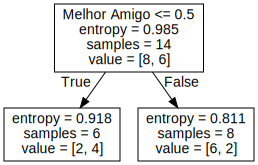

In [19]:
# Gerando o gráfico da árvore baseada em entropia
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [20]:
# Árvore baseada no Índice Gini
modelo_v2 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'gini', # Critério do índice Gini
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2) 

In [21]:
# Treinando o modelo
modelo_v2.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Definindo o nome do arquivo com a arvore de decisão 2
arquivo = 'C:/Users/lucas/Downloads/tree_modelo_v2.dot'

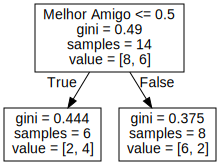

In [23]:
# Gerando o gráfico da árvore baseada no Índice Gini
export_graphviz(modelo_v2, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)